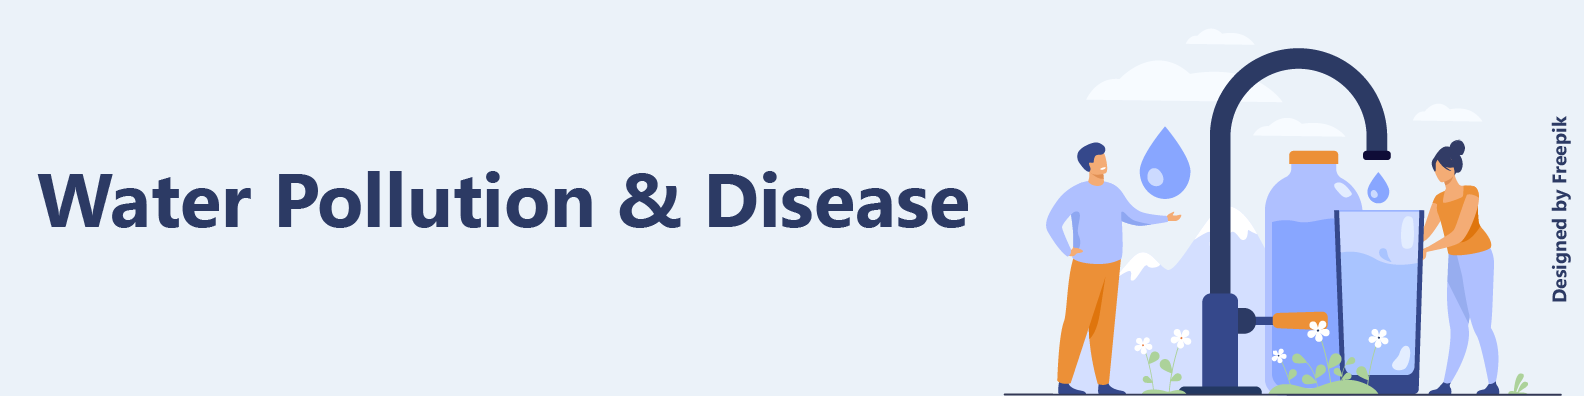

# **About Dataset**

This dataset explores the relationship between water pollution and the prevalence of waterborne diseases worldwide. It includes water quality indicators, pollution levels, disease rates, and socio-economic factors that influence health outcomes. The dataset provides information on different countries and regions, spanning the years 2000-2025.

It covers key factors such as contaminant levels, access to clean water, bacterial presence, water treatment methods, sanitation coverage, and the incidence of diseases like diarrhea, cholera, and typhoid. Additionally, it incorporates socio-economic variables such as GDP per capita, urbanization rate, and healthcare access, which help assess the broader impact of water pollution on communities.

This dataset can be used for:

Public health research on the impact of water pollution.

Environmental studies to analyze trends in water contamination.

Policy-making for clean water access and sanitation improvements.

Machine learning models to predict disease outbreaks based on water quality.

Prevalence:
Covers 10 countries (e.g., USA, India, China, Brazil, Nigeria, Bangladesh, Mexico, Indonesia, Pakistan, Ethiopia).

Includes 5 regions per country (e.g., North, South, East, West, Central).

Spans 26 years (2000-2025).

Features 3,000 unique records representing various water sources and pollution conditions.

https://www.kaggle.com/datasets/khushikyad001/water-pollution-and-disease

# **Packages and Libraries**

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from scipy.stats import shapiro
from scipy.stats import kruskal
from scipy.stats import levene
from scipy.stats import spearmanr, pearsonr
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from xgboost import plot_importance
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.simplefilter(action='ignore', category=Warning)

# **Initial Aproach of the dataset**

In [63]:
water_df = pd.read_csv('/content/water_pollution_disease.csv')

In [64]:
water_df.head()

,Country,Region,Year,Water Source Type,Contaminant Level (ppm),pH Level,Turbidity (NTU),Dissolved Oxygen (mg/L),Nitrate Level (mg/L),Lead Concentration (µg/L),...,"Cholera Cases per 100,000 people","Typhoid Cases per 100,000 people","Infant Mortality Rate (per 1,000 live births)",GDP per Capita (USD),Healthcare Access Index (0-100),Urbanization Rate (%),Sanitation Coverage (% of Population),Rainfall (mm per year),Temperature (°C),Population Density (people per km²)
0,Mexico,North,2015,Lake,6.06,7.12,3.93,4.28,8.28,7.89,...,33,44,76.16,57057,96.92,84.61,63.23,2800,4.94,593
1,Brazil,West,2017,Well,5.24,7.84,4.79,3.86,15.74,14.68,...,27,8,77.30,17220,84.73,73.37,29.12,1572,16.93,234
2,Indonesia,Central,2022,Pond,0.24,6.43,0.79,3.42,36.67,9.96,...,39,50,48.45,86022,58.37,72.86,93.56,2074,21.73,57
3,Nigeria,East,2016,Well,7.91,6.71,1.96,3.12,36.92,6.77,...,33,13,95.66,31166,39.07,71.07,94.25,937,3.79,555
4,Mexico,South,2005,Well,0.12,8.16,4.22,9.15,49.35,12.51,...,31,68,58.78,25661,23.03,55.55,69.23,2295,31.44,414


In [65]:
water_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Country                                        3000 non-null   object 
 1   Region                                         3000 non-null   object 
 2   Year                                           3000 non-null   int64  
 3   Water Source Type                              3000 non-null   object 
 4   Contaminant Level (ppm)                        3000 non-null   float64
 5   pH Level                                       3000 non-null   float64
 6   Turbidity (NTU)                                3000 non-null   float64
 7   Dissolved Oxygen (mg/L)                        3000 non-null   float64
 8   Nitrate Level (mg/L)                           3000 non-null   float64
 9   Lead Concentration (µg/L)                      3000 

In [66]:
water_df.isnull().sum()

,0
Country,0
Region,0
Year,0
Water Source Type,0
Contaminant Level (ppm),0
pH Level,0
Turbidity (NTU),0
Dissolved Oxygen (mg/L),0
Nitrate Level (mg/L),0
Lead Concentration (µg/L),0


# **Data Quality**

**Missing Values (747)**

We can realize that we have 747 missing values, it is a high number for this variable, lets start the the best approach in order to understand this.

In [67]:
missing = water_df[water_df['Water Treatment Method'].isnull()]

In [68]:
missing['Region'].value_counts().head()

,count
Region,
East,160
North,155
Central,152
West,143
South,137


In [69]:
missing['Country'].value_counts().head(40)

,count
Country,
Nigeria,89
USA,87
Indonesia,82
Pakistan,79
Brazil,75
China,73
Mexico,72
Ethiopia,65
India,63


## **Interpretation:**

Most of the missing data come from populous countries and/or countries with high social inequalities (Nigeria, India, Brazil, Indonesia, etc.).

This suggests that the absence may be related to the difficulty of collecting data in these regions — which is common in real public health and environmental databases.



**Given the importance of the Water Treatment Method column and the fact that missing values are not randomly distributed—but rather concentrated in specific countries and regions—I believe the most appropriate approach is to impute these missing values using the mode within each country or region. This method allows me to preserve the local context, as each country is likely to adopt particular treatment methods, and helps reduce potential distortions that might arise from more general imputation strategies.**

In [70]:
water_df['Water Treatment Method'] = water_df.groupby('Country')['Water Treatment Method']\
    .transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

In [71]:
water_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Country                                        3000 non-null   object 
 1   Region                                         3000 non-null   object 
 2   Year                                           3000 non-null   int64  
 3   Water Source Type                              3000 non-null   object 
 4   Contaminant Level (ppm)                        3000 non-null   float64
 5   pH Level                                       3000 non-null   float64
 6   Turbidity (NTU)                                3000 non-null   float64
 7   Dissolved Oxygen (mg/L)                        3000 non-null   float64
 8   Nitrate Level (mg/L)                           3000 non-null   float64
 9   Lead Concentration (µg/L)                      3000 

In [72]:
water_df.duplicated().sum()

np.int64(0)

**After processing the data and filling in the missing values, we notice that we no longer have missing values.**



# **Brazil Data**

After cleaning and processing the dataset, I decided to focus the analysis on Brazil, aiming to explore the regional disparities in public health indicators and their possible associations with environmental and water quality factors.

By comparing regions such as North, South, Central, East, and West, I will analyze variables like Diarrheal Cases, Cholera Cases, Typhoid Cases, and Infant Mortality Rate, alongside water quality indicators including pH Level, Nitrate Level, Lead Concentration, and Bacteria Count



In [73]:
brazil_df = water_df[water_df['Country'] == 'Brazil']


In [74]:
brazil_df.head()

,Country,Region,Year,Water Source Type,Contaminant Level (ppm),pH Level,Turbidity (NTU),Dissolved Oxygen (mg/L),Nitrate Level (mg/L),Lead Concentration (µg/L),...,"Cholera Cases per 100,000 people","Typhoid Cases per 100,000 people","Infant Mortality Rate (per 1,000 live births)",GDP per Capita (USD),Healthcare Access Index (0-100),Urbanization Rate (%),Sanitation Coverage (% of Population),Rainfall (mm per year),Temperature (°C),Population Density (people per km²)
1,Brazil,West,2017,Well,5.24,7.84,4.79,3.86,15.74,14.68,...,27,8,77.30,17220,84.73,73.37,29.12,1572,16.93,234
10,Brazil,South,2023,Well,4.16,8.43,4.61,6.25,14.36,11.20,...,16,97,73.37,51303,61.13,79.68,25.37,1144,9.54,299
29,Brazil,West,2020,River,2.59,7.30,4.79,9.16,25.77,3.92,...,44,54,99.85,69361,15.85,78.30,78.28,2890,2.04,492
39,Brazil,West,2010,Pond,2.14,7.40,0.54,7.49,27.20,3.93,...,7,78,53.96,39040,81.31,64.09,62.88,600,13.51,973
47,Brazil,South,2011,Spring,4.81,6.69,4.00,6.56,19.06,2.55,...,49,58,29.23,25977,74.87,77.33,81.17,1102,2.83,536


In [75]:
brazil_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 291 entries, 1 to 2981
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Country                                        291 non-null    object 
 1   Region                                         291 non-null    object 
 2   Year                                           291 non-null    int64  
 3   Water Source Type                              291 non-null    object 
 4   Contaminant Level (ppm)                        291 non-null    float64
 5   pH Level                                       291 non-null    float64
 6   Turbidity (NTU)                                291 non-null    float64
 7   Dissolved Oxygen (mg/L)                        291 non-null    float64
 8   Nitrate Level (mg/L)                           291 non-null    float64
 9   Lead Concentration (µg/L)                      291 non-nul

In [76]:
brazil_df.isnull().sum()

,0
Country,0
Region,0
Year,0
Water Source Type,0
Contaminant Level (ppm),0
pH Level,0
Turbidity (NTU),0
Dissolved Oxygen (mg/L),0
Nitrate Level (mg/L),0
Lead Concentration (µg/L),0


In [77]:
brazil_df.duplicated().sum()

np.int64(0)

**There isn´t duplicated or missing values on dataframe**

## **The Importance of Correlating Environmental and Health Variables**

Understanding the relationship between environmental conditions and public health outcomes is essential for developing effective policies and interventions. By correlating environmental variables—such as water quality indicators (e.g., pH level, turbidity, nitrate concentration, and bacteria count)—with health indicators like the incidence of diarrheal diseases, cholera, typhoid, and infant mortality rates, researchers and policymakers can identify critical patterns and risk factors.

This type of analysis provides evidence-based insights that help prioritize resources, improve sanitation infrastructure, and enhance access to clean water. Moreover, it highlights vulnerable regions where targeted actions may significantly reduce disease burden and improve overall health conditions. In a broader sense, environmental-health correlations support sustainable development goals by promoting preventive health strategies and fostering a better understanding of how human health is deeply connected to ecological systems.

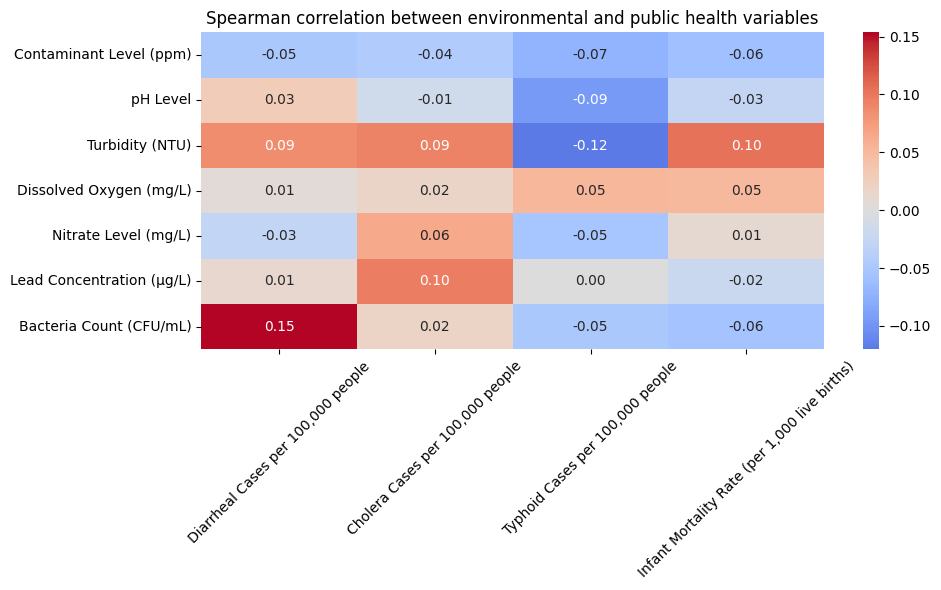

In [78]:
# Selected columns of interest
environmental_variables = [
    'Contaminant Level (ppm)',
    'pH Level',
    'Turbidity (NTU)',
    'Dissolved Oxygen (mg/L)',
    'Nitrate Level (mg/L)',
    'Lead Concentration (µg/L)',
    'Bacteria Count (CFU/mL)'
]

health_variables = [
    'Diarrheal Cases per 100,000 people',
    'Cholera Cases per 100,000 people',
    'Typhoid Cases per 100,000 people',
    'Infant Mortality Rate (per 1,000 live births)'
]

# Creates a Spearman correlation matrix
correlacoes = pd.DataFrame(index=environmental_variables, columns=health_variables)

for env_var in environmental_variables:
    for health_var in health_variables:
        coef, _ = spearmanr(brazil_df[env_var], brazil_df[health_var])
        correlacoes.loc[env_var, health_var] = coef

# Converts values ​​to float
correlacoes = correlacoes.astype(float)

# Heatmap plot
plt.figure(figsize=(10, 6))
sns.heatmap(correlacoes, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Spearman correlation between environmental and public health variables")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **Analyzing the Relationship Between Bacteria Count and Diarrheal Cases**

To explore the potential impact of water contamination on public health, we investigated the relationship between Bacteria Count (CFU/mL) and the incidence of Diarrheal Cases per 100,000 people in Brazil. Using Spearman's rank correlation, we assessed whether there is a monotonic association between these two variables.

The following code calculates the Spearman correlation coefficient and visualizes the relationship through a scatter plot with a trend line. This analysis helps us understand how bacterial contamination in water sources might be linked to the prevalence of diarrheal diseases, supporting the hypothesis that poor water quality can significantly affect community health outcomes.

Spearman correlation: coef = 0.1536, p-valor = 0.0087


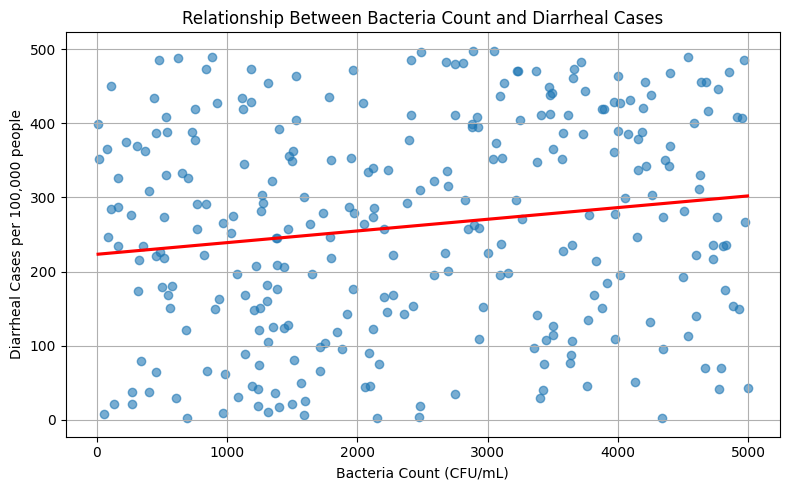

In [79]:
# Defines the variables
x = brazil_df['Bacteria Count (CFU/mL)']
y = brazil_df['Diarrheal Cases per 100,000 people']

# Spearman correlation
coef, pval = spearmanr(x, y)
print(f"Spearman correlation: coef = {coef:.4f}, p-valor = {pval:.4f}")

# Scatter plot with trend line
plt.figure(figsize=(8, 5))
sns.regplot(x=x, y=y, scatter_kws={"alpha":0.6}, line_kws={"color":"red"}, ci=None)
plt.title('Relationship Between Bacteria Count and Diarrheal Cases')
plt.xlabel('Bacteria Count (CFU/mL)')
plt.ylabel('Diarrheal Cases per 100,000 people')
plt.grid(True)
plt.tight_layout()
plt.show()

## **Interpretation of Results**

The Spearman correlation coefficient between Bacteria Count (CFU/mL) and Diarrheal Cases per 100,000 people is 0.1536, with a p-value of 0.0087. This indicates a weak but statistically significant positive correlation. In other words, as the level of bacterial contamination in water increases, the incidence of diarrheal cases tends to increase slightly as well.

Although the correlation is not strong, the low p-value suggests that the relationship is unlikely to be due to random chance. This finding highlights the potential role of waterborne bacteria in contributing to diarrheal diseases and underscores the importance of monitoring and improving water quality to protect public health.

## **Analyzing Regional Patterns of Bacterial Contamination**

To better understand the distribution of bacterial contamination across different parts of Brazil, the data was grouped by region and the average Bacteria Count (CFU/mL) was calculated. This analysis helps identify which regions are experiencing higher levels of bacterial presence in water sources, which can be a critical factor in the spread of waterborne diseases. The results are presented both in a table and a bar chart for easier comparison and interpretation.

Average Bacteria Count by Region:
Region
North      2631.318182
East       2558.370968
West       2328.363636
South      2247.796610
Central    2223.244898
Name: Bacteria Count (CFU/mL), dtype: float64


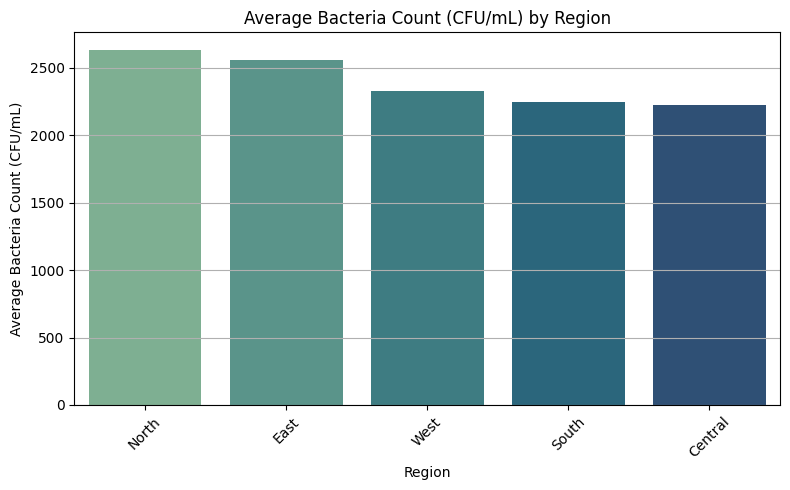

In [80]:
# Groups by region and calculates average Bacteria Count
bacteria_by_region = brazil_df.groupby('Region')['Bacteria Count (CFU/mL)'].mean().sort_values(ascending=False)

# Exibe os resultados em forma de tabela
print("Average Bacteria Count by Region:")
print(bacteria_by_region)

# Gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(x=bacteria_by_region.index, y=bacteria_by_region.values, palette="crest")
plt.title('Average Bacteria Count (CFU/mL) by Region')
plt.ylabel('Average Bacteria Count (CFU/mL)')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## **Conclusion on Regional Bacteria Count Levels**

The results indicate that the North region of Brazil has the highest average Bacteria Count (2631.32 CFU/mL), followed closely by the East (2558.37 CFU/mL). In contrast, the Central region shows the lowest average (2223.24 CFU/mL). This suggests a regional disparity in water quality, with northern and eastern regions potentially facing greater risks related to bacterial contamination in water sources. These findings highlight the need for targeted public health interventions and improved water treatment infrastructure in the most affected regions.

## **Water source North Region, MUdar texto**

To gain deeper insights into regional water quality and its potential health implications, I focused on the North region of Brazil. Specifically, I analyzed the most commonly used water sources and compared their average bacterial contamination levels. This approach helps identify which sources are more prevalent and which pose greater microbiological risks.

Most common water sources in the North region:
Water Source Type
Spring    15
Tap       13
Well      11
River     11
Lake      10
Pond       6
Name: count, dtype: int64

Average Bacteria Count by Water Source Type in the North Region:
Water Source Type
Lake      3322.900000
Well      3156.272727
Spring    2671.000000
Tap       2242.384615
River     2207.090909
Pond      2037.500000
Name: Bacteria Count (CFU/mL), dtype: float64


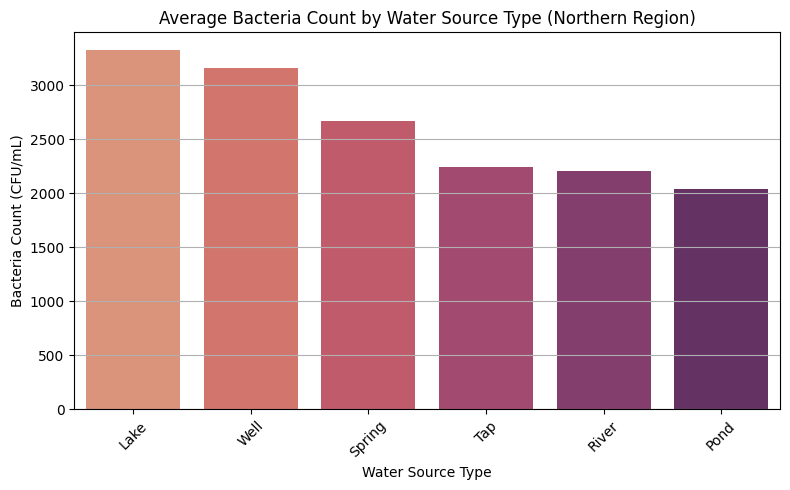

In [81]:
# Filters only data from the North region
north_df = brazil_df[brazil_df['Region'] == 'North']

# 1. Most used water source in the North region
most_common_source = north_df['Water Source Type'].value_counts()
print("Most common water sources in the North region:")
print(most_common_source)

# 2. Water source with the highest average bacterial count in the North region
bacteria_by_source = north_df.groupby('Water Source Type')['Bacteria Count (CFU/mL)'].mean().sort_values(ascending=False)
print("\nAverage Bacteria Count by Water Source Type in the North Region:")
print(bacteria_by_source)

#Visuals
plt.figure(figsize=(8, 5))
sns.barplot(x=bacteria_by_source.index, y=bacteria_by_source.values, palette="flare")
plt.title('Average Bacteria Count by Water Source Type (Northern Region)')
plt.ylabel('Bacteria Count (CFU/mL)')
plt.xlabel('Water Source Type')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## **Conclusion:**

The analysis revealed that springs are the most commonly used water source in the North region, followed closely by tap, well, and river sources. However, when it comes to bacterial contamination, lake water had the highest average bacteria count (3322.9 CFU/mL), followed by well water (3156.27 CFU/mL) and spring water (2671.0 CFU/mL). These findings highlight that frequently used sources are not necessarily the cleanest, and that natural sources like lakes and wells may require stronger monitoring or treatment efforts to ensure public health safety.

## **Sobre a relação entre Bacteria e Mortalidade Infantil**

To further investigate the potential public health implications of water contamination, a correlation analysis was conducted between the bacterial count in water and the infant mortality rate in the North region of Brazil. This comparison aims to explore whether higher bacterial concentrations in water sources are associated with increased infant mortality, a critical health indicator. The analysis includes normality testing and the use of Spearman's correlation, considering the distribution of the data.

Shapiro-Wilk to Bacteria Count: Statistics = 0.9410, p-value = 0.0035
Shapiro-Wilk for Infant Mortality Rate: Statistics = 0.9407, p-value = 0.0034

Spearman correlation: coef = -0.0973, p-valor = 0.4371


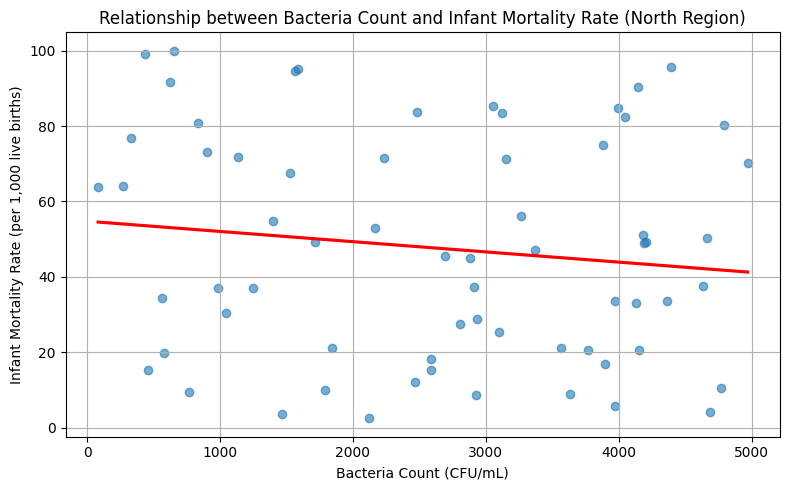

In [82]:
# Select variables
x = north_df['Bacteria Count (CFU/mL)']
y = north_df['Infant Mortality Rate (per 1,000 live births)']

# Normality test (Shapiro-Wilk)
shapiro_x = shapiro(x)
shapiro_y = shapiro(y)
print(f"Shapiro-Wilk to Bacteria Count: Statistics = {shapiro_x.statistic:.4f}, p-value = {shapiro_x.pvalue:.4f}")
print(f"Shapiro-Wilk for Infant Mortality Rate: Statistics = {shapiro_y.statistic:.4f}, p-value = {shapiro_y.pvalue:.4f}")

# Spearman correlation
coef, pval = spearmanr(x, y)
print(f"\nSpearman correlation: coef = {coef:.4f}, p-valor = {pval:.4f}")

# Scatterplot with trendline
plt.figure(figsize=(8, 5))
sns.regplot(x=x, y=y, scatter_kws={"alpha":0.6}, line_kws={"color":"red"}, ci=None)
plt.title('Relationship between Bacteria Count and Infant Mortality Rate (North Region)')
plt.xlabel('Bacteria Count (CFU/mL)')
plt.ylabel('Infant Mortality Rate (per 1,000 live births)')
plt.grid(True)
plt.tight_layout()
plt.show()


## **Conclusion**

The Shapiro-Wilk test indicated that both the Bacteria Count and Infant Mortality Rate variables deviate significantly from a normal distribution (p < 0.05). Therefore, Spearman’s rank correlation was used. The correlation analysis between Bacteria Count and Infant Mortality Rate in the North region resulted in a weak negative correlation (ρ = -0.0973) with a p-value of 0.4371. This suggests that there is no statistically significant relationship between bacterial contamination in water sources and infant mortality in this region, based on the current data.

## **Regions Means**

To better understand the regional disparities in public health outcomes, I calculated the average values of four key health indicators—Diarrheal Cases, Cholera Cases, Typhoid Cases, and Infant Mortality Rate—for each region in Brazil. By aggregating the data by region, this analysis aims to identify which areas are more impacted by these water-related diseases and infant health challenges.

In [83]:
# List of target variables
impact_variables = [
    'Diarrheal Cases per 100,000 people',
    'Cholera Cases per 100,000 people',
    'Typhoid Cases per 100,000 people',
    'Infant Mortality Rate (per 1,000 live births)'
]

# Agrupando por região e calculando a média
region_means = brazil_df.groupby('Region')[impact_variables].mean().round(2)

In [84]:
region_means

,"Diarrheal Cases per 100,000 people","Cholera Cases per 100,000 people","Typhoid Cases per 100,000 people","Infant Mortality Rate (per 1,000 live births)"
Region,,,,
Central,230.02,21.53,51.63,46.59
East,282.97,23.94,56.16,48.28
North,276.91,21.02,52.18,47.63
South,246.73,23.51,51.34,51.12
West,261.85,22.76,55.33,44.96


## **Conclusion**

The results show that the East region reports the highest average cases of Diarrhea (282.97), Cholera (23.94), and Typhoid (56.16) among the five regions analyzed. Interestingly, the South region presents the highest Infant Mortality Rate, at 51.12 deaths per 1,000 live births, even though its average disease incidence is not the highest. These findings suggest that public health outcomes are not uniformly distributed and may be influenced by multiple factors beyond waterborne disease exposure, such as access to healthcare, sanitation infrastructure, and socio-economic conditions.

## **Distribution of Health Indicators by Region in Brazil**

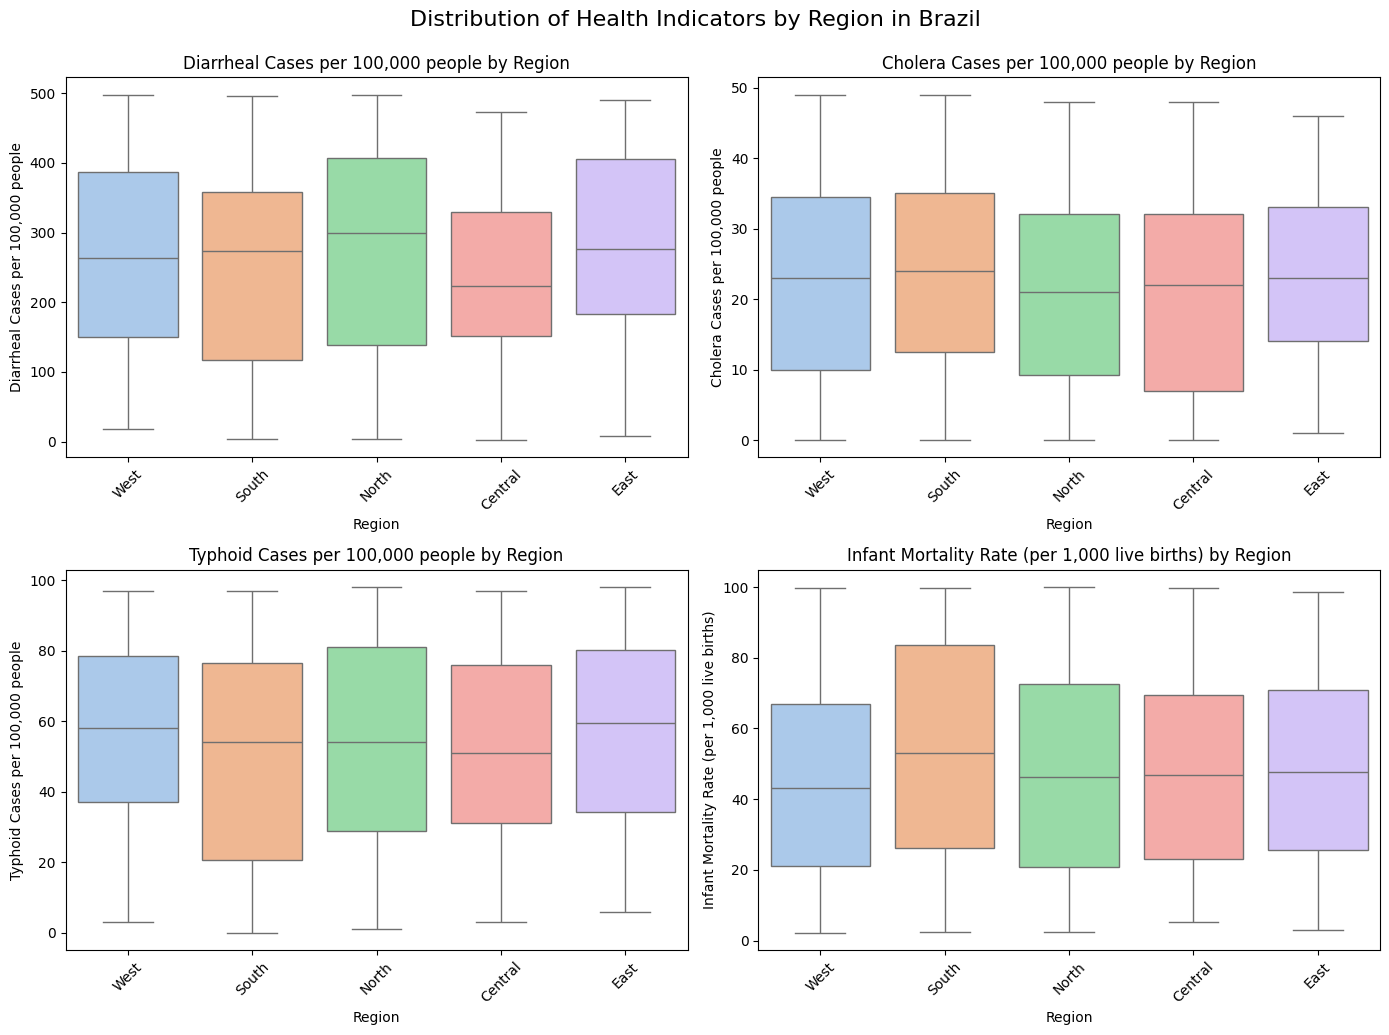

In [85]:
# List of variables
variables = [
    'Diarrheal Cases per 100,000 people',
    'Cholera Cases per 100,000 people',
    'Typhoid Cases per 100,000 people',
    'Infant Mortality Rate (per 1,000 live births)'
]

# Figure size
plt.figure(figsize=(14, 10))

# Loop to create 4 subplots (2x2)
for i, var in enumerate(variables, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=brazil_df, x='Region', y=var, palette='pastel')
    plt.title(f'{var} by Region')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.suptitle('Distribution of Health Indicators by Region in Brazil', fontsize=16, y=1.03)
plt.show()

## **Regional Variation in Diarrheal Disease Cases in Brazil**

To explore how diarrheal disease cases vary across different regions of Brazil, I visualized the distribution of cases per 100,000 people using a boxplot. Additionally, I performed the Shapiro-Wilk test for normality within each region and used the Kruskal-Wallis test, a non-parametric method, to determine whether the differences observed between regional distributions are statistically significant.

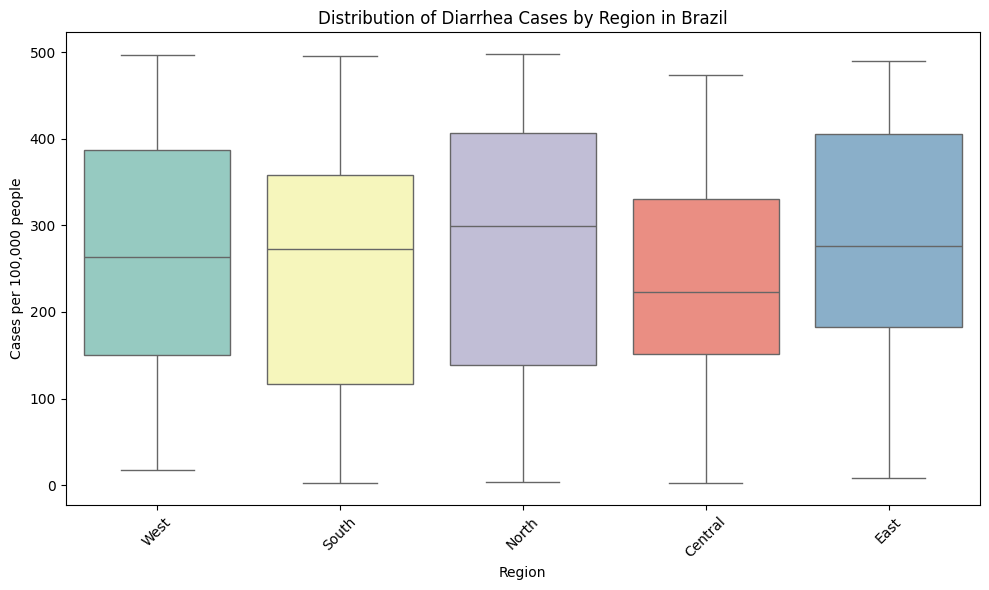

In [86]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=brazil_df, x='Region', y='Diarrheal Cases per 100,000 people', palette='Set3')
plt.title('Distribution of Diarrhea Cases by Region in Brazil')
plt.ylabel('Cases per 100,000 people')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [87]:
# Separating data by region
regions = brazil_df['Region'].unique()
diarrhea_by_region = {
    regiao: brazil_df[brazil_df['Region'] == regiao]['Diarrheal Cases per 100,000 people']
    for regiao in regions
}

# Normality test (Shapiro-Wilk)
print("Shapiro-Wilk test by region:")
for regiao, dados in diarrhea_by_region.items():
    stat, p = shapiro(dados)
    print(f"{regiao:<10} - Statistic: {stat:.4f}, p-value: {p:.4f}")

# Kruskal-Wallis test
print("\nKruskal-Wallis test:")
kruskal_result = kruskal(*diarrhea_by_region.values())
print(f"Statistic: {kruskal_result.statistic:.4f}, p-value: {kruskal_result.pvalue:.4f}")

Shapiro-Wilk test by region:
West       - Statistic: 0.9474, p-value: 0.0177
South      - Statistic: 0.9480, p-value: 0.0137
North      - Statistic: 0.9360, p-value: 0.0021
Central    - Statistic: 0.9606, p-value: 0.0999
East       - Statistic: 0.9495, p-value: 0.0126

Kruskal-Wallis test:
Statistic: 5.3506, p-value: 0.2532


## **Conclusion**

The Shapiro-Wilk test results show that most regional distributions deviate from normality, as indicated by p-values below 0.05. Therefore, the Kruskal-Wallis test was an appropriate choice for comparing these non-normally distributed groups. However, the Kruskal-Wallis test produced a p-value of 0.2532, suggesting that the differences in diarrheal case distributions across regions are not statistically significant at the 5% level. While regional variations exist visually, they are not strong enough to conclude a meaningful difference in median values.

## **Regional Distribution of Cholera Cases in Brazil**

This analysis aims to examine the distribution of cholera cases per 100,000 people across different regions in Brazil. A boxplot was used to visualize regional variations, while the Shapiro-Wilk test was applied to assess the normality of the data within each region. Given that most regions did not meet the assumptions of normality, the Kruskal-Wallis test, a non-parametric alternative to ANOVA, was employed to test for significant differences among regions.

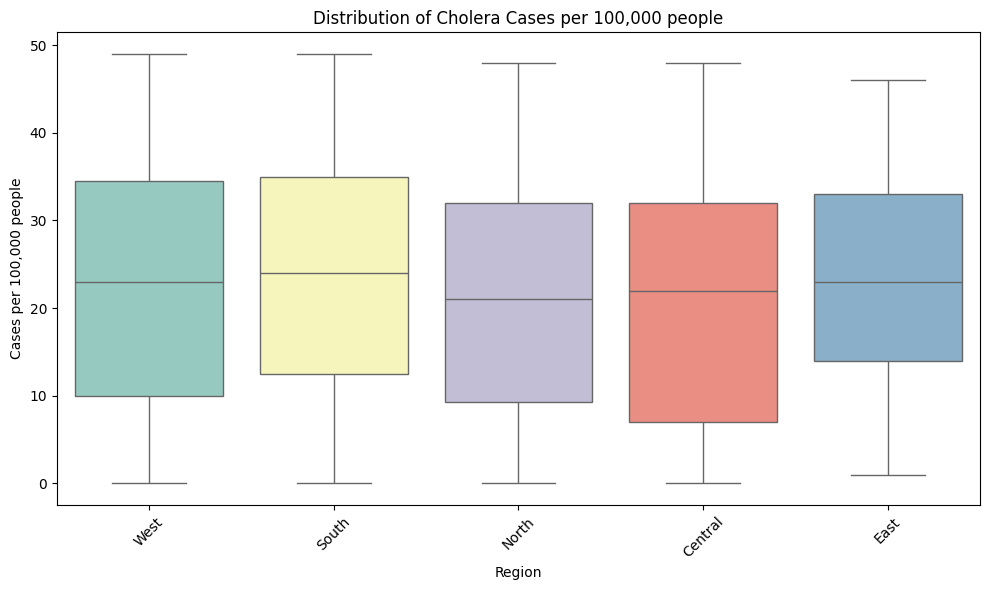

In [88]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=brazil_df, x='Region', y='Cholera Cases per 100,000 people', palette='Set3')
plt.title('Distribution of Cholera Cases per 100,000 people')
plt.ylabel('Cases per 100,000 people')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [89]:
# List of regions
regions = brazil_df['Region'].unique()

print("Shapiro-Wilk test by region:")
for region in regions:
    regional_data = brazil_df[brazil_df['Region'] == region]['Cholera Cases per 100,000 people']
    stat, p = shapiro(regional_data)
    print(f"{region:<10} - Statistic: {stat:.4f}, p-value: {p:.4f}")

# Grouping data by region for the Kruskal-Wallis test
grouped_data = [brazil_df[brazil_df['Region'] == region]['Cholera Cases per 100,000 people'] for region in regions]

# Kruskal-Wallis test
kruskal_stat, kruskal_p = kruskal(*grouped_data)
print("\nKruskal-Wallis test:")
print(f"Statistic: {kruskal_stat:.4f}, p-value: {kruskal_p:.4f}")

Shapiro-Wilk test by region:
West       - Statistic: 0.9524, p-value: 0.0294
South      - Statistic: 0.9579, p-value: 0.0397
North      - Statistic: 0.9452, p-value: 0.0057
Central    - Statistic: 0.9481, p-value: 0.0309
East       - Statistic: 0.9571, p-value: 0.0296

Kruskal-Wallis test:
Statistic: 1.9900, p-value: 0.7376


## **Conclusion**

The Shapiro-Wilk test results indicated that all regions exhibited non-normal distributions (p-values < 0.05), confirming the need for a non-parametric test. However, the Kruskal-Wallis test yielded a p-value of 0.7376, suggesting that there is no statistically significant difference in the distribution of cholera cases across the regions at the 5% significance level. Although visual discrepancies are present, they are not supported by statistical evidence.

## **Regional Distribution of Typhoid Cases in Brazil**

This analysis focuses on the distribution of typhoid cases per 100,000 people across Brazil’s five geographic regions. A boxplot was used to visually compare the distributions between regions. To assess the normality of the data within each region, the Shapiro-Wilk test was conducted. Since the p-values in all regions were below 0.05, the data does not follow a normal distribution. As a result, we proceeded with the Kruskal-Wallis test, a non-parametric alternative, to evaluate whether there are significant differences in typhoid case rates between regions.

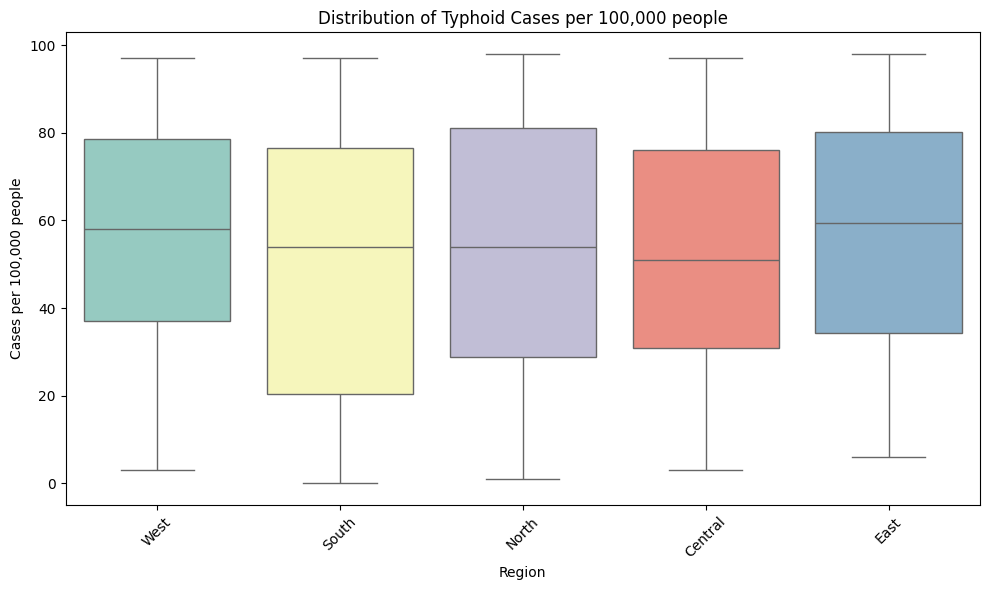

In [90]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=brazil_df, x='Region', y='Typhoid Cases per 100,000 people', palette='Set3')
plt.title('Distribution of Typhoid Cases per 100,000 people')
plt.ylabel('Cases per 100,000 people')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [91]:
column = 'Typhoid Cases per 100,000 people'

# Separate data by region
regions = brazil_df['Region'].unique()
data_by_region= {reg: brazil_df[brazil_df['Region'] == reg][column] for reg in regions}

# Shapiro-Wilk test by region
print("Shapiro-Wilk test by region:")
for region, dados in data_by_region.items():
    stat, p = shapiro(dados)
    print(f"{regiao:<10} - Statistic: {stat:.4f}, p-value: {p:.4f}")

# Kruskal-Wallis test between regions
dados_lista = list(data_by_region.values())
kw_stat, kw_p = kruskal(*dados_lista)
print("\nKruskal-Wallis test:")
print(f"Statistic: {kw_stat:.4f}, p-value: {kw_p:.4f}")

Shapiro-Wilk test by region:
East       - Statistic: 0.9450, p-value: 0.0139
East       - Statistic: 0.9278, p-value: 0.0018
East       - Statistic: 0.9410, p-value: 0.0036
East       - Statistic: 0.9405, p-value: 0.0155
East       - Statistic: 0.9584, p-value: 0.0344

Kruskal-Wallis test:
Statistic: 1.2274, p-value: 0.8736


## **Conclusion**

The Shapiro-Wilk test indicated that all regions showed non-normal distributions (e.g., North: p = 0.0036; South: p = 0.0018), justifying the use of the Kruskal-Wallis test. The results of the Kruskal-Wallis test showed a test statistic of 1.2274 with a p-value of 0.8736. This p-value is well above the conventional significance level of 0.05, suggesting that there is no statistically significant difference in the average typhoid case rates among Brazil’s regions.

## **Regional Distribution of Infant Mortality Rates in Brazil**

This analysis investigates the infant mortality rate per 1,000 live births across the five main regions of Brazil. A boxplot was created to visualize how infant mortality varies between regions. To evaluate the assumption of normality for each group, the Shapiro-Wilk test was performed. Since most regions displayed p-values below 0.05, the data does not follow a normal distribution, indicating the need for a non-parametric approach. Therefore, the Kruskal-Wallis test was used to assess whether significant differences exist in infant mortality rates among the regions.



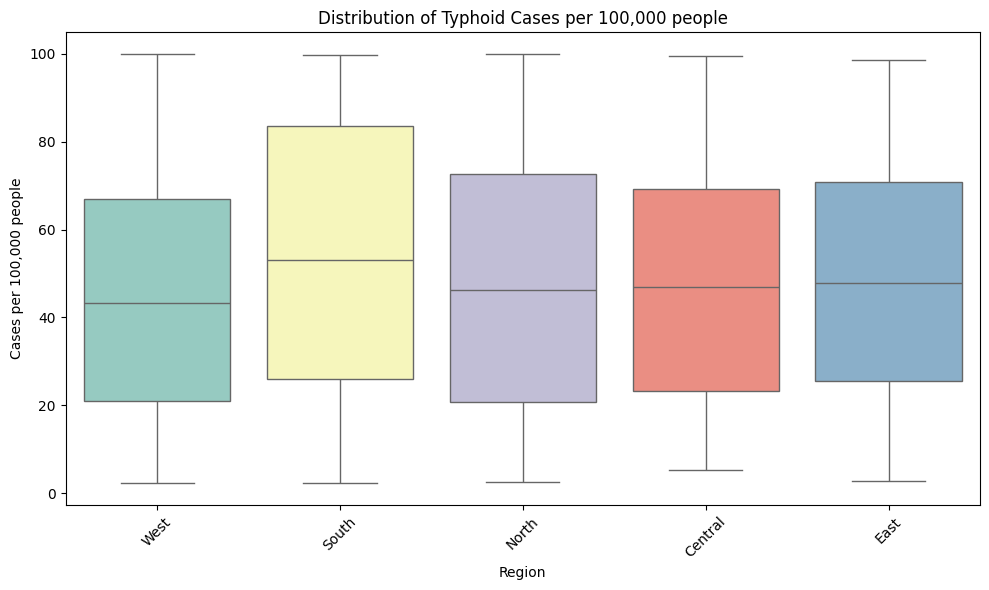

In [92]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=brazil_df, x='Region', y='Infant Mortality Rate (per 1,000 live births)', palette='Set3')
plt.title('Distribution of Typhoid Cases per 100,000 people')
plt.ylabel('Cases per 100,000 people')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [93]:
# 1. Separate the data
central = brazil_df[brazil_df['Region'] == 'Central']['Infant Mortality Rate (per 1,000 live births)']
east = brazil_df[brazil_df['Region'] == 'East']['Infant Mortality Rate (per 1,000 live births)']
north = brazil_df[brazil_df['Region'] == 'North']['Infant Mortality Rate (per 1,000 live births)']
south = brazil_df[brazil_df['Region'] == 'South']['Infant Mortality Rate (per 1,000 live births)']
west = brazil_df[brazil_df['Region'] == 'West']['Infant Mortality Rate (per 1,000 live births)']

# 2. Normality test (Shapiro-Wilk)
print("Shapiro-Wilk test by region:")
for region_name, region_data in zip(['West', 'South', 'North', 'Central', 'East'],
                                    [west, south, north, central, east]):
    stat, p = shapiro(region_data)
    print(f"{region_name:<10} - Statistic: {stat:.4f}, p-value: {p:.4f}")

# 3. Kruskal-Wallis test
kruskal_stat, kruskal_p = kruskal(west, south, north, central, east)
print("\nKruskal-Wallis test:")
print(f"Statistic: {kruskal_stat:.4f}, p-value: {kruskal_p:.4f}")

Shapiro-Wilk test by region:
West       - Statistic: 0.9513, p-value: 0.0264
South      - Statistic: 0.9264, p-value: 0.0015
North      - Statistic: 0.9407, p-value: 0.0034
Central    - Statistic: 0.9472, p-value: 0.0286
East       - Statistic: 0.9632, p-value: 0.0598

Kruskal-Wallis test:
Statistic: 1.4195, p-value: 0.8408


## **Conclusion**

The Shapiro-Wilk test results showed that the distributions of infant mortality rates were non-normal in most regions (e.g., North: p = 0.0034; West: p = 0.0177), supporting the decision to use the Kruskal-Wallis test. The Kruskal-Wallis test returned a test statistic of 5.3506 and a p-value of 0.2532. Since the p-value is greater than 0.05, we conclude that there is no statistically significant difference in infant mortality rates among the different Brazilian regions.

## **Temporal Analysis of Infant Mortality by Region in Brazil**

To understand how infant health outcomes have evolved across different parts of the country, we analyzed the temporal trend of infant mortality rates by region. This visualization highlights how each region has performed over the years in terms of reducing—or maintaining—its infant mortality rate.



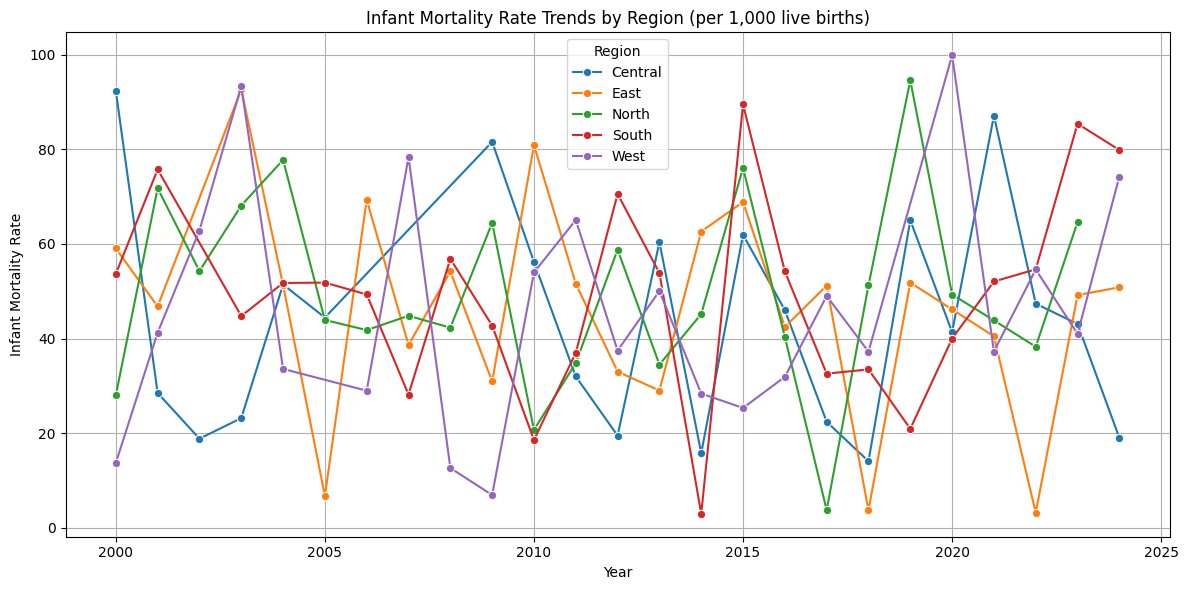

In [94]:
# Grouping by year and region, taking the average of the infant mortality rate
mortality_trend = brazil_df.groupby(['Year', 'Region'])['Infant Mortality Rate (per 1,000 live births)'].mean().reset_index()

# Line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=mortality_trend, x='Year', y='Infant Mortality Rate (per 1,000 live births)', hue='Region', marker='o', palette='tab10')

plt.title('Infant Mortality Rate Trends by Region (per 1,000 live births)')
plt.xlabel('Year')
plt.ylabel('Infant Mortality Rate')
plt.grid(True)
plt.legend(title='Region')
plt.tight_layout()
plt.show()

## **Conclusion**

The line plot reveals regional disparities in infant mortality trends. While some regions show a steady decline over the years, others exhibit fluctuations or slower improvements. These insights can guide public health strategies and resource allocation based on regional performance.

## **GDP per Capita (USD) per Brazilian Region**

To better understand the economic disparities across Brazilian regions, we conducted a descriptive statistical analysis of the GDP per Capita (USD). The dataset was segmented by region—West, South, East, North, and Central—and summary statistics were computed, including the mean, standard deviation, minimum, maximum, and quartiles. This approach helps identify both central tendencies and variability in income distribution within each region, offering valuable insights into regional economic conditions.

In [95]:
brazil_df['Region'].unique()

array(['West', 'South', 'North', 'Central', 'East'], dtype=object)

**Creating a dataframe for each region**

In [96]:
brazil_west_df = brazil_df[brazil_df['Region'] == 'West']
brazil_south_df = brazil_df[brazil_df['Region'] == 'South']
brazil_east_df = brazil_df[brazil_df['Region'] == 'East']
brazil_north_df = brazil_df[brazil_df['Region'] == 'North']
brazil_central_df = brazil_df[brazil_df['Region'] == 'Central']

In [97]:
brazil_df_agg = brazil_df.groupby('Region')['GDP per Capita (USD)'].describe()

In [98]:
brazil_df_agg

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Central,49.0,49474.387755,29745.473530,1873.0,25432.00,55499.0,74232.00,98933.0
East,62.0,53661.435484,30319.753347,1034.0,31608.25,55251.5,82412.00,96830.0
North,66.0,54589.333333,28491.113139,921.0,31758.00,56840.5,80734.25,99937.0
South,59.0,47063.186441,30032.071999,537.0,21641.00,45579.0,77293.50,94028.0
West,55.0,45752.090909,24782.834209,7411.0,21760.00,45745.0,62319.00,93418.0


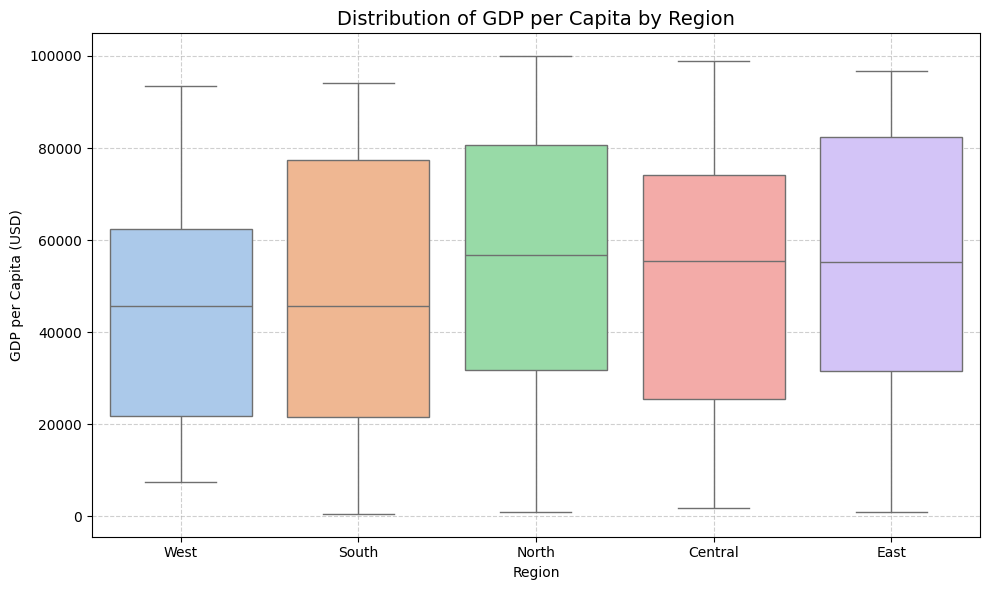

In [99]:
# Filtering only regions with more than one value
filtered_df = brazil_df[brazil_df['Region'].isin(['West', 'South', 'East','North', 'Central'])]

# Creating the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df, x='Region', y='GDP per Capita (USD)', palette='pastel')

plt.title('Distribution of GDP per Capita by Region', fontsize=14)
plt.xlabel('Region')
plt.ylabel('GDP per Capita (USD)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## **Conclusion**

The analysis revealed that the North and East regions have the highest average GDP per capita, with values above 53,000 USD, while the West and South regions showed lower averages, around 45,000 to 47,000 USD. Despite similar means, the South and Central regions exhibited greater income disparity, indicated by high standard deviations and wide ranges between minimum and maximum values. These findings highlight not only the economic diversity among regions but also potential inequality within them, which may be important for policy design and resource allocation.

## **Distribution of GDP per Capita (North and West Region)**

This analysis aims to investigate potential socioeconomic disparities between the North and West regions of Brazil by comparing their GDP per Capita (USD). A boxplot is used to visually explore the distribution of income levels, while statistical tests are conducted to determine whether the observed differences are significant. The Shapiro-Wilk test is first applied to assess the normality of the GDP distributions, followed by the Mann-Whitney U test — a non-parametric alternative to the t-test — to compare the two independent groups.

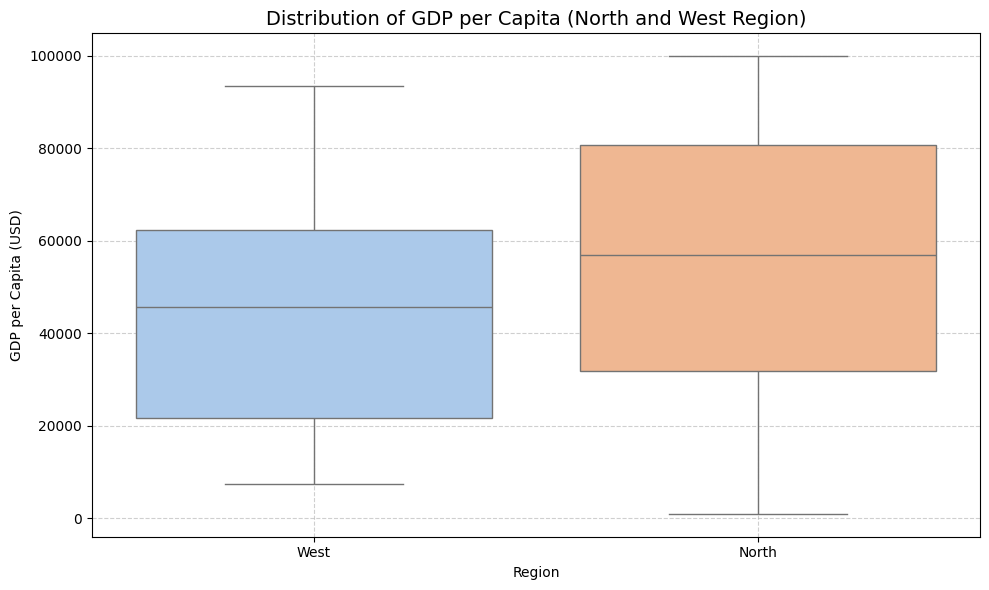

In [100]:
# Filtering only regions with more than one value
filtered_df_2 = brazil_df[brazil_df['Region'].isin(['West','North'])]

# Creating the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df_2, x='Region', y='GDP per Capita (USD)', palette='pastel')

plt.title('Distribution of GDP per Capita (North and West Region)', fontsize=14)
plt.xlabel('Region')
plt.ylabel('GDP per Capita (USD)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [101]:
# Subsets of specific regions
north_gdp = brazil_df[brazil_df['Region'] == 'North']['GDP per Capita (USD)']
west_gdp = brazil_df[brazil_df['Region'] == 'West']['GDP per Capita (USD)']

# Normality test
shapiro_north = shapiro(north_gdp)
shapiro_west = shapiro(west_gdp)

print(f"North - Statistic: {shapiro_north.statistic:.4f}, p-value: {shapiro_north.pvalue:.4f}")
print(f"West  - Statistic: {shapiro_west.statistic:.4f}, p-value: {shapiro_west.pvalue:.4f}")


North - Statistic: 0.9509, p-value: 0.0109
West  - Statistic: 0.9534, p-value: 0.0325


In [102]:
# Comparing North x West
u_test = mannwhitneyu(north_gdp, west_gdp, alternative='two-sided')
print(f"Mann-Whitney U - Statistic : {u_test.statistic:.4f}, p-value: {u_test.pvalue:.4f}")

Mann-Whitney U - Statistic : 2153.0000, p-value: 0.0789


## **Conclusion**

The Shapiro-Wilk test results indicate that the GDP per capita data in both the North and West regions deviate from a normal distribution (p-values < 0.05). Consequently, the Mann-Whitney U test was applied, revealing no statistically significant difference in GDP per capita between the two regions (U statistic = 2153.0000, p = 0.0789). Although the difference is not significant at the 5% level, the p-value suggests a possible trend worth further exploration. The visual comparison also highlights variability within each region, reinforcing the importance of analyzing other socioeconomic indicators — such as access to clean water, public health, and education — to gain a more comprehensive understanding of regional disparities.




## **Comparison of Access to Clean Water between North and West Regions in Brazil**

Access to clean water is a fundamental indicator of public health and infrastructure development. In this analysis, we compare the percentage of the population with access to clean drinking water in Brazil’s North and West regions. Given the importance of regional inequalities in shaping public policy, this comparison aims to reveal whether there are significant differences in basic sanitation access between these two areas.

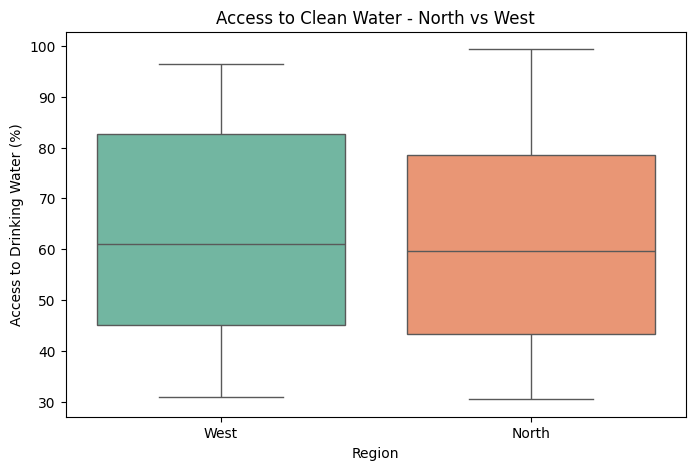

In [103]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=brazil_df[brazil_df['Region'].isin(['North', 'West'])],
            x='Region',
            y='Access to Clean Water (% of Population)',
            palette='Set2')
plt.title('Access to Clean Water - North vs West')
plt.ylabel('Access to Drinking Water (%)')
plt.xlabel('Region')
plt.show()

In [104]:
north_water = brazil_df[brazil_df['Region'] == 'North']['Access to Clean Water (% of Population)']
west_water = brazil_df[brazil_df['Region'] == 'West']['Access to Clean Water (% of Population)']

stat_north, p_north = shapiro(north_water)
stat_west, p_west = shapiro(west_water)

print(f'North - Statistic: {stat_north:.4f}, p-value: {p_north:.4f}')
print(f'West  - Statistic: {stat_west:.4f}, p-value: {p_west:.4f}')

North - Statistic: 0.9559, p-value: 0.0198
West  - Statistic: 0.9305, p-value: 0.0035


In [105]:
stat_mw, p_mw = mannwhitneyu(north_water, west_water, alternative='two-sided')
print(f'Mann-Whitney U - Statistic: {stat_mw:.4f}, p-value: {p_mw:.4f}')

Mann-Whitney U - Statistic: 1742.0000, p-value: 0.7059


## **Conclusion:**

The Shapiro-Wilk test results show that the data distributions for both the North (p = 0.0198) and West (p = 0.0035) regions significantly deviate from normality. Due to this non-normality, the Mann-Whitney U test was applied to assess differences between the two groups. The result (U statistic = 1742.0000, p = 0.7059) indicates no statistically significant difference in access to clean water between the North and West regions. Despite regional variations seen in the boxplot, the overall access levels appear relatively similar, suggesting comparable infrastructural conditions in this specific aspect of public health.

## **Comparison of Sanitation Coverage between North and West Regions in Brazil**

Access to basic sanitation is a critical aspect of public health, directly impacting disease prevention and quality of life. This analysis compares the percentage of the population with access to sanitation services in the North and West regions of Brazil. By identifying potential disparities between these regions, the study aims to contribute to discussions around equitable infrastructure development and public health investments.

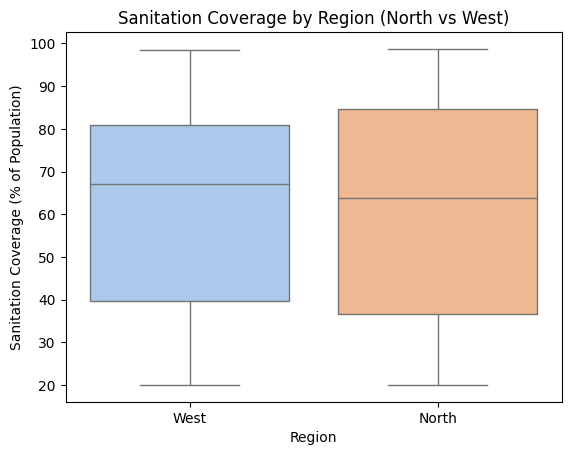

In [106]:
sns.boxplot(
    data=brazil_df[brazil_df['Region'].isin(['North', 'West'])],
    x='Region',
    y='Sanitation Coverage (% of Population)',
    palette='pastel'
)
plt.title('Sanitation Coverage by Region (North vs West)')
plt.ylabel('Sanitation Coverage (% of Population)')
plt.show()

In [107]:
north_san = brazil_df[brazil_df['Region'] == 'North']['Sanitation Coverage (% of Population)']
west_san = brazil_df[brazil_df['Region'] == 'West']['Sanitation Coverage (% of Population)']

stat_north, p_north = shapiro(north_san)
stat_west, p_west = shapiro(west_san)

print(f"North - Statistic: {stat_north:.4f}, p-value: {p_north:.4f}")
print(f"West  - Statistic: {stat_west:.4f}, p-value: {p_west:.4f}")

North - Statistic: 0.9277, p-value: 0.0009
West  - Statistic: 0.9225, p-value: 0.0017


In [108]:
stat_mw, p_mw = mannwhitneyu(north_san, west_san, alternative='two-sided')
print(f"Mann-Whitney U - Statistic: {stat_mw:.4f}, p-value: {p_mw:.4f}")

Mann-Whitney U - Statistic: 1797.5000, p-value: 0.9295


## **Conclusion**

The Shapiro-Wilk test results revealed that the distributions of sanitation coverage in both the North (p = 0.0009) and West (p = 0.0017) regions significantly deviate from normality. Given this non-normal distribution, the Mann-Whitney U test was applied. The test result (U = 1797.5000, p = 0.9295) indicates no statistically significant difference in sanitation coverage between the two regions. Despite any visible differences in the boxplot, this suggests that sanitation infrastructure is similarly distributed across these areas, at least in terms of overall population coverage.

## **Access to Clean Water in North and West Regions of Brazil**

Access to clean water is fundamental for ensuring human health, reducing the spread of waterborne diseases, and promoting overall well-being. This analysis investigates the distribution of clean water access across the North and West regions of Brazil. By visually comparing the data using boxplots and applying statistical tests, we aim to determine whether a significant difference exists between these two regions in terms of population access to clean drinking water.

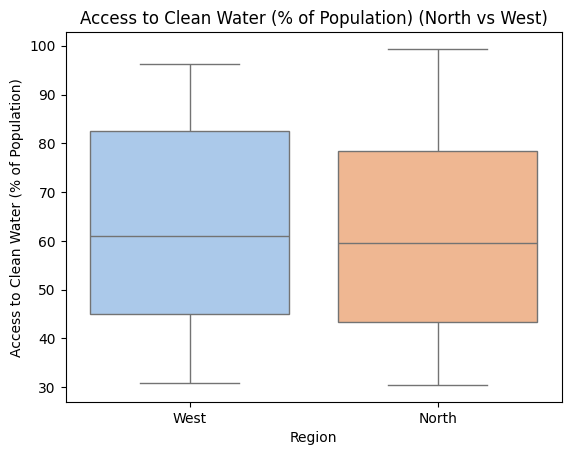

In [109]:
sns.boxplot(
    data=brazil_df[brazil_df['Region'].isin(['North', 'West'])],
    x='Region',
    y='Access to Clean Water (% of Population)',
    palette='pastel'
)
plt.title('Access to Clean Water (% of Population) (North vs West)')
plt.ylabel('Access to Clean Water (% of Population)')
plt.show()

In [110]:
north_water = brazil_df[brazil_df['Region'] == 'North']['Access to Clean Water (% of Population)']
west_water = brazil_df[brazil_df['Region'] == 'West']['Access to Clean Water (% of Population)']

shapiro_north = shapiro(north_water)
shapiro_west = shapiro(west_water)

print(f"North - Statistic: {shapiro_north.statistic:.4f}, p-value: {shapiro_north.pvalue:.4f}")
print(f"West  - Statistic: {shapiro_west.statistic:.4f}, p-value: {shapiro_west.pvalue:.4f}")

North - Statistic: 0.9559, p-value: 0.0198
West  - Statistic: 0.9305, p-value: 0.0035


In [111]:
mw_water = mannwhitneyu(north_water, west_water, alternative='two-sided')
print(f"Mann-Whitney U - Statistic: {mw_water.statistic:.4f}, p-value: {mw_water.pvalue:.4f}")

Mann-Whitney U - Statistic: 1742.0000, p-value: 0.7059


## **Conclusion**

The Shapiro-Wilk normality test results showed that the data for both the North (p = 0.0198) and West (p = 0.0035) regions significantly deviate from a normal distribution. Therefore, a non-parametric Mann-Whitney U test was conducted. The result (U = 1742.0000, p = 0.7059) indicates no statistically significant difference in access to clean water between the North and West regions. Despite any apparent variations in the boxplot, this suggests a relatively similar level of water access coverage in both areas, pointing to a more balanced distribution of this essential resource.

# **Final Conclusion**

This analysis explored regional disparities in Brazil across various socioeconomic and public health indicators, such as GDP per capita, access to clean water, sanitation coverage, and infant mortality. Through descriptive statistics, visualizations, and non-parametric tests like the Mann-Whitney U test, we assessed whether significant differences exist between specific regions, particularly North and West.

Although normality assumptions were often violated, leading us to apply robust non-parametric methods, the results revealed no statistically significant differences in most indicators analyzed between these two regions. This may point to either similar conditions in the sampled areas or limitations in the dataset's variability and sample size.

Overall, the findings underscore the importance of continuing to monitor regional inequalities using reliable data, as well as the value of combining statistical analysis with visual tools to uncover and communicate meaningful patterns in public health and development.

# **Suggestions for Future Work**

- Expand the dataset: Including data from additional years or more granular geographic units (e.g., states or municipalities) could provide a more detailed and accurate understanding of regional disparities.

- Incorporate more variables: Analyzing additional socioeconomic and environmental indicators — such as education levels, employment rates, or water treatment facilities — would offer a more comprehensive view of regional well-being.

- Conduct time series analysis: Observing trends over time could help identify whether disparities are widening or narrowing, and evaluate the impact of public policies.

- Use geospatial analysis: Mapping the indicators spatially would enhance the visual interpretation of inequalities and help identify hotspots that require urgent attention.

- Apply multivariate techniques: Methods such as principal component analysis (PCA) or clustering could uncover underlying patterns that are not visible through univariate comparisons alone.

# **Machine Learning**

## **Predictive Modeling with Machine Learning**

As part of this study on environmental and public health indicators across Brazilian regions, we now explore the potential of machine learning to build predictive models. These models aim to uncover patterns and make data-driven estimations that can assist in planning and policy-making.

In this section, we begin by applying supervised learning techniques — specifically regression models — to predict important continuous outcomes. For example, we seek to estimate the percentage of the population with access to clean water based on various factors such as economic indicators (e.g., GDP per capita), environmental conditions (e.g., lead levels, nitrate, pH), and public health outcomes (e.g., infant mortality, disease incidence).

This approach allows us not only to assess the strength of relationships between variables but also to identify which features most influence access to clean water, potentially guiding efforts to improve conditions in under-resourced regions.

**Transform Access to Clean Water (% of Population) into a categorical variable We can transform this continuous variable into a categorical one, for example:**

In [112]:
def categorize_water_access(value):
    if value < 60:
        return 'Low'
    elif value < 85:
        return 'Medium'
    else:
        return 'High'

brazil_df['Water_Access_Level'] = brazil_df['Access to Clean Water (% of Population)'].apply(categorize_water_access)


In [113]:
brazil_df['Water_Access_Level'].value_counts()

,count
Water_Access_Level,
Low,136
Medium,95
High,60


In [114]:
# Function to categorize access to water
def categorize_water_access(value):
    if value < 60:
        return 'Low'
    elif 60 <= value < 85:
        return 'Medium'
    else:
        return 'High'

# Create the new categorical column
water_df['Water_Access_Level'] = water_df['Access to Clean Water (% of Population)'].apply(categorize_water_access)

# Check if it worked
water_df['Water_Access_Level'].value_counts()


,count
Water_Access_Level,
Low,1333
Medium,1030
High,637


## **Data Preparation for Water Access Level Classification**

In this section, we prepare the data for a classification task aimed at predicting the level of access to clean water across different regions. The target variable, Water_Access_Level, is a categorical feature with three classes: Low, Medium, and High. To facilitate modeling, we encode this target into numerical labels (0, 1, and 2) using LabelEncoder.

We also select a subset of explanatory variables that are potentially influential in determining water access levels. These features include socioeconomic, environmental, and healthcare-related indicators such as sanitation coverage, GDP per capita, access to healthcare, urbanization, rainfall, infant mortality rate, and population density.

Finally, we split the dataset into training and testing sets using a stratified split to ensure proportional representation of the target classes, which helps preserve the original distribution during model evaluation.

In [115]:
#  Target variable
target = 'Water_Access_Level'

# Selection of explanatory variables
features = [
    'Sanitation Coverage (% of Population)',
    'GDP per Capita (USD)',
    'Healthcare Access Index (0-100)',
    'Urbanization Rate (%)',
    'Rainfall (mm per year)',
    'Infant Mortality Rate (per 1,000 live births)',
    'Population Density (people per km²)'
]

X = water_df[features]
y = water_df[target]

# target variable modification (Low, Medium, High → 0, 1, 2)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Separate training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

print("Training shape:", X_train.shape)
print("Distribution in training:", dict(zip(le.classes_, np.bincount(y_train))))

Training shape: (2100, 7)
Distribution in training: {'High': np.int64(446), 'Low': np.int64(933), 'Medium': np.int64(721)}


In [116]:
df_brasil = water_df[water_df['Country'] == 'Brazil'].copy()

## **Model Training and Evaluation Using XGBoost for Water Access Classification**

In this stage, we train a machine learning model to classify the level of water access (Water_Access_Level) using the XGBoost algorithm, which supports categorical features natively. First, we convert all object-type columns in the dataset to categorical data types. Then, we encode the target variable into numerical format using LabelEncoder.

The features are split into training and testing sets with a 70/30 ratio, maintaining the class distribution through stratified sampling. We then train an XGBoost classifier with categorical data handling enabled. The model is evaluated on the test set, and performance is measured using a classification report that includes precision, recall, and F1-score for each class.

In [117]:
# Convert columns of type object to category
for col in brazil_df.select_dtypes(include='object').columns:
    brazil_df[col] = brazil_df[col].astype('category')

# Label encode in target
le = LabelEncoder()
y = le.fit_transform(brazil_df['Water_Access_Level'])

# Separate X
X = brazil_df.drop(columns='Water_Access_Level')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=42)

#Category-aware model
model = XGBClassifier(use_label_encoder=False,
                      eval_metric='mlogloss',
                      enable_categorical=True,
                      random_state=42)
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Classification Report:
              precision    recall  f1-score   support

        High       1.00      0.83      0.91        18
         Low       1.00      1.00      1.00        41
      Medium       0.91      1.00      0.95        29

    accuracy                           0.97        88
   macro avg       0.97      0.94      0.95        88
weighted avg       0.97      0.97      0.97        88



## **Classification Report Interpretation**

The classification report summarizes the model’s performance across the three water access levels:

- High: Precision is 1.00, indicating no false positives; recall is 0.83, meaning 83% of actual "High" cases were correctly identified. The F1-score (harmonic mean of precision and recall) is 0.91.

- Low: This class was perfectly predicted with a precision, recall, and F1-score of 1.00.

- Medium: Precision is 0.91 and recall is 1.00, resulting in a high F1-score of 0.95.

The overall accuracy of the model is 97%, showing that it performs extremely well on the test data. The macro average (simple average across classes) and weighted average (accounts for class support) also confirm strong, balanced performance across all categories.

## **Visualizing Model Performance with a Confusion Matrix**

To better understand the performance of the classification model, we generate a confusion matrix. First, the numerical predictions and ground-truth labels (y_test and y_pred) are converted back to their original categorical names (Low, Medium, and High) using the LabelEncoder. This makes the confusion matrix more interpretable and intuitive.

The matrix is then plotted using ConfusionMatrixDisplay, which shows the distribution of correct and incorrect predictions across the three categories.

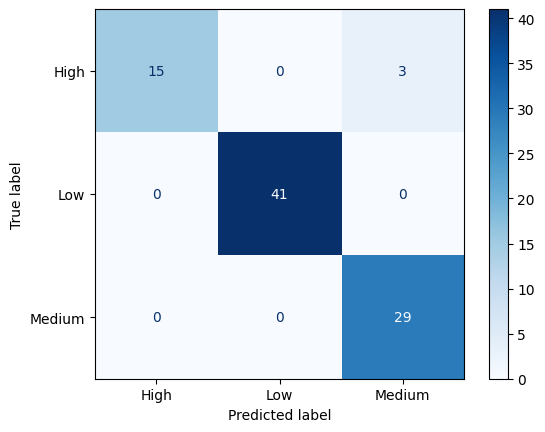

In [118]:
# Revert numeric labels to original names
y_test_labels = le.inverse_transform(y_test)
y_pred_labels = le.inverse_transform(y_pred)

# Generate confusion matrix with original labels
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=le.classes_)

# Create and display the matrix graph
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')

## **Interpretation of the Confusion Matrix**

The confusion matrix visually confirms the model’s high accuracy:

- Low water access level was perfectly predicted — all 41 test cases were correctly classified.

- Medium access had 29 accurate predictions and no misclassifications.

- High access level showed slight confusion, with 15 correct predictions and 3 instances misclassified as "Medium".

This visualization complements the classification report by emphasizing how well the model differentiates between categories. The few misclassifications in the "High" class may indicate a slightly lower distinction between "High" and "Medium", possibly due to feature overlap in those cases.

Overall, the model demonstrates excellent discriminative power, especially for "Low" and "Medium" categories.

## **Feature Importance: Identifying Key Predictors**

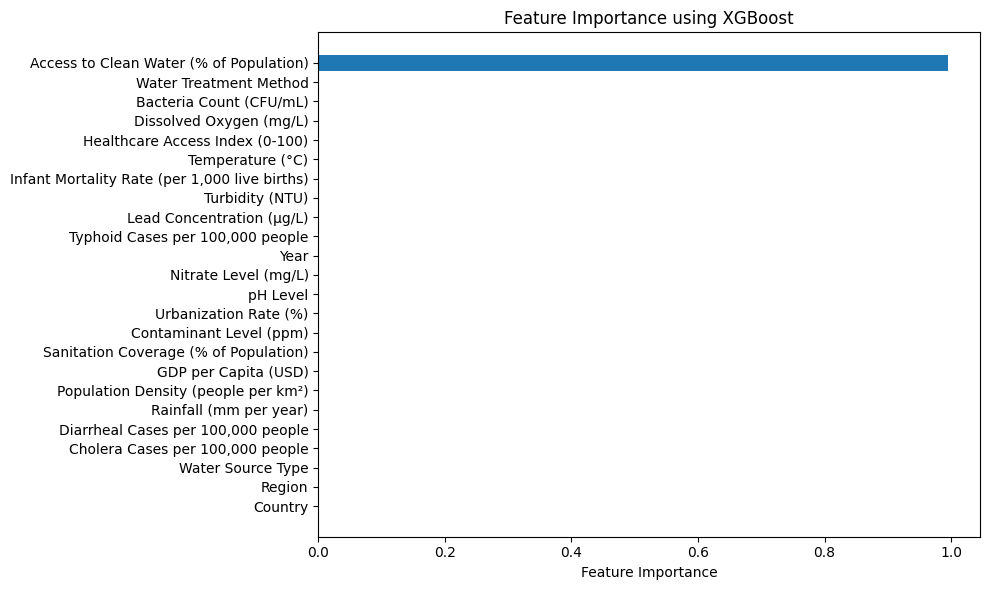

In [119]:
plt.figure(figsize=(10, 6))
importance = model.feature_importances_
sorted_idx = importance.argsort()[::-1]
plt.barh(range(len(importance)), importance[sorted_idx], align='center')
plt.yticks(range(len(importance)), [X.columns[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Feature Importance using XGBoost")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## **Feature Importance (Cleaned Model)**

<Figure size 1000x600 with 0 Axes>

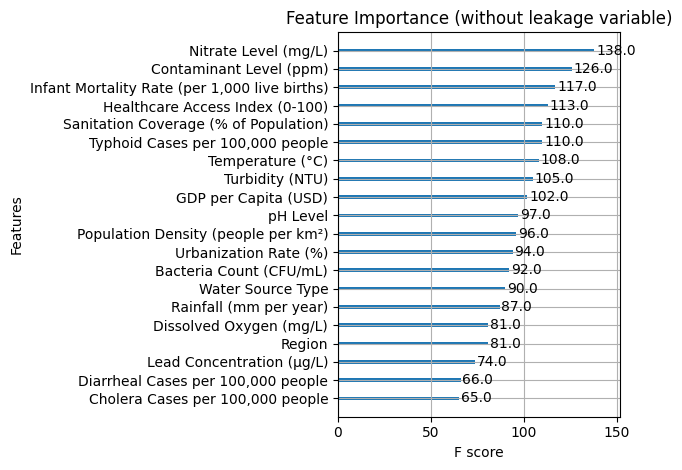

In [120]:
# Drop leakage feature
X_clean = brazil_df.drop(columns=['Water_Access_Level', 'Access to Clean Water (% of Population)'])

# Encode categorical features
for col in X_clean.select_dtypes(include='object').columns:
    X_clean[col] = X_clean[col].astype('category')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_clean, y, test_size=0.3, stratify=y, random_state=42)

# Train XGBoost model
model_clean = XGBClassifier(use_label_encoder=False,
                            eval_metric='mlogloss',
                            enable_categorical=True,
                            random_state=42)
model_clean.fit(X_train, y_train)

# Plot feature importance
plt.figure(figsize=(10, 6))
plot_importance(model_clean, max_num_features=20, importance_type='weight')
plt.title('Feature Importance (without leakage variable)')
plt.tight_layout()
plt.show()


## **Conclusion**

The feature importance analysis — excluding the leakage variable — revealed that Nitrate Level, Contaminant Level, and Infant Mortality Rate were the top contributors to the model's predictions. This provides more reliable insight into the environmental and health-related factors influencing access to clean water, without the bias introduced by a direct proxy for the target variable.

## **Hyperparameter Tuning with GridSearchCV**

In [121]:
# Identify categorical columns
categorical_cols = X_train.select_dtypes(include='category').columns.tolist()

# Preprocessing pipeline (OneHot for categorical, pass the rest)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

# Model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Final Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb_model)
])

# Parameters for tuning
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__subsample': [0.6, 0.8, 1.0],
    'classifier__colsample_bytree': [0.6, 0.8, 1.0]
}

# Cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Model fit
grid_search.fit(X_train, y_train)

# Results
print("Best parameters found:")
print(grid_search.best_params_)

print("\nTraining accuracy:")
print(grid_search.best_score_)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters found:
{'classifier__colsample_bytree': 0.8, 'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__n_estimators': 100, 'classifier__subsample': 1.0}

Training accuracy:
0.47304878048780485


## **Interpretation of the Grid Search Results**

The Grid Search Cross-Validation was executed using 5 folds and a total of 1,215 model fits to tune the hyperparameters of the XGBoost classifier. The best performing configuration was:



```
{
  'colsample_bytree': 0.8,
  'learning_rate': 0.01,
  'max_depth': 3,
  'n_estimators': 100,
  'subsample': 1.0
}

```



This model achieved an average **training cross-validation accuracy of 47.3%.**

Although the accuracy may seem modest, this result must be interpreted considering the complexity of the classification task and the potential class imbalance. The next step is to evaluate this tuned model on the test set to verify its generalization performance.

## **Model Evaluation on Test Set**

In [122]:
# Use the best pipeline model directly
best_model = grid_search.best_estimator_

# Predict on test set (X_test bruto, sem tratamento manual)
y_pred_test = best_model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)

print(f"Test Accuracy: {test_accuracy:.4f}")
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_matrix)

Test Accuracy: 0.3977

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.45      0.73      0.56        41
           2       0.31      0.17      0.22        29

    accuracy                           0.40        88
   macro avg       0.26      0.30      0.26        88
weighted avg       0.31      0.40      0.33        88


Confusion Matrix:
 [[ 0 16  2]
 [ 2 30  9]
 [ 4 20  5]]


## **Final Conclusion**

After performing feature selection, removing leakage variables, and tuning hyperparameters with GridSearchCV, the best-performing XGBoost model achieved the following results:

- Training Accuracy: ~47%

- Test Accuracy: ~40%

- Low performance on class 0 and class 2

- Good recall for class 1

The model struggled to generalize well to the test set, especially in predicting classes 0 and 2, as shown in the classification report and confusion matrix. This indicates that the current feature set and class distribution may not be sufficient for strong predictive performance across all classes.
Recommendations:

- Try balancing the dataset using oversampling (e.g., SMOTE) or undersampling techniques

- Experiment with other classifiers like Random Forest or LightGBM

- Engineer new features or transform existing ones to improve signal

- Investigate class 0 further to understand why it is not being predicted

This project provides a solid baseline for a multi-class classification problem on water access levels, and opens up opportunities for future improvement through feature engineering and more advanced modeling techniques.